In [4]:
import pandas as pd
import glob
import os
import geopandas as gpd
from os.path import join

In [ ]:
carpeta = "data/RSH 2016 - 2021/*.csv"
codigos_comunales = pd.read_csv(join("data", "codigos_comunales.csv"))
dict_mapas = {}
for ruta_archivo in glob.glob(carpeta):
    df = pd.read_csv(ruta_archivo)
    nombre_archivo = os.path.basename(ruta_archivo).split(".")[0]
    df.columns = [
    "codigo comuna",
    "hogares tramo 0 - 40",
    "hogares tramo 41 - 50",
    "hogares tramo 51 - 60",
    "hogares tramo 61 - 70",
    "hogares tramo 71 - 80",
    "hogares tramo 81 - 90",
    "hogares tramo 91 - 100",
    "total hogares"
]
    df = df.astype(int)
    df_final = pd.merge(df, codigos_comunales, how="right", on="codigo comuna")

    df_pobreza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 0 - 40"]]
    df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
    df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)

    df_riqueza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 71 - 80", "hogares tramo 81 - 90", "hogares tramo 91 - 100"]]
    df_riqueza["prc tramos altos"] = (df_final["hogares tramo 71 - 80"] + \
                                      df_final["hogares tramo 81 - 90"] + \
                                      df_final["hogares tramo 91 - 100"]) / df_final["total hogares"]
    df_riqueza.sort_values("prc tramos altos", inplace=True, ignore_index=True)

    mapa: gpd.GeoDataFrame = gpd.read_file(join("data", "r13.geojson"))
    mapa["codigo_comuna"] = mapa["codigo_comuna"].astype(int)
    mapa = mapa.dissolve("codigo_comuna")
    mapa = pd.merge(mapa, df_pobreza[["codigo comuna", "prc tramo 0 - 40"]], how="left", left_index=True, right_on="codigo comuna")
    mapa = pd.merge(mapa, df_riqueza[["codigo comuna", "prc tramos altos", "nombre comuna"]], how="left", on="codigo comuna")

    dict_mapas[nombre_archivo.split("_")[3]] = mapa

    

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2016')

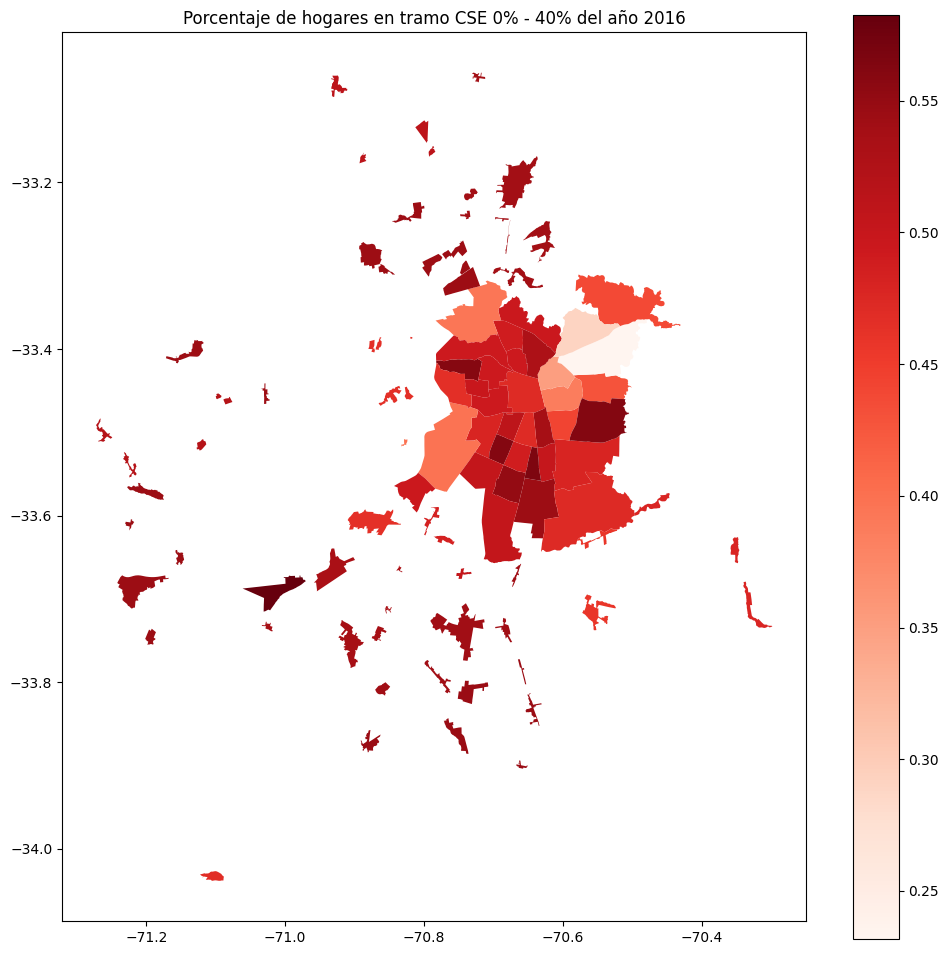

In [13]:
mapa = dict_mapas["201606"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2016")


Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2016')

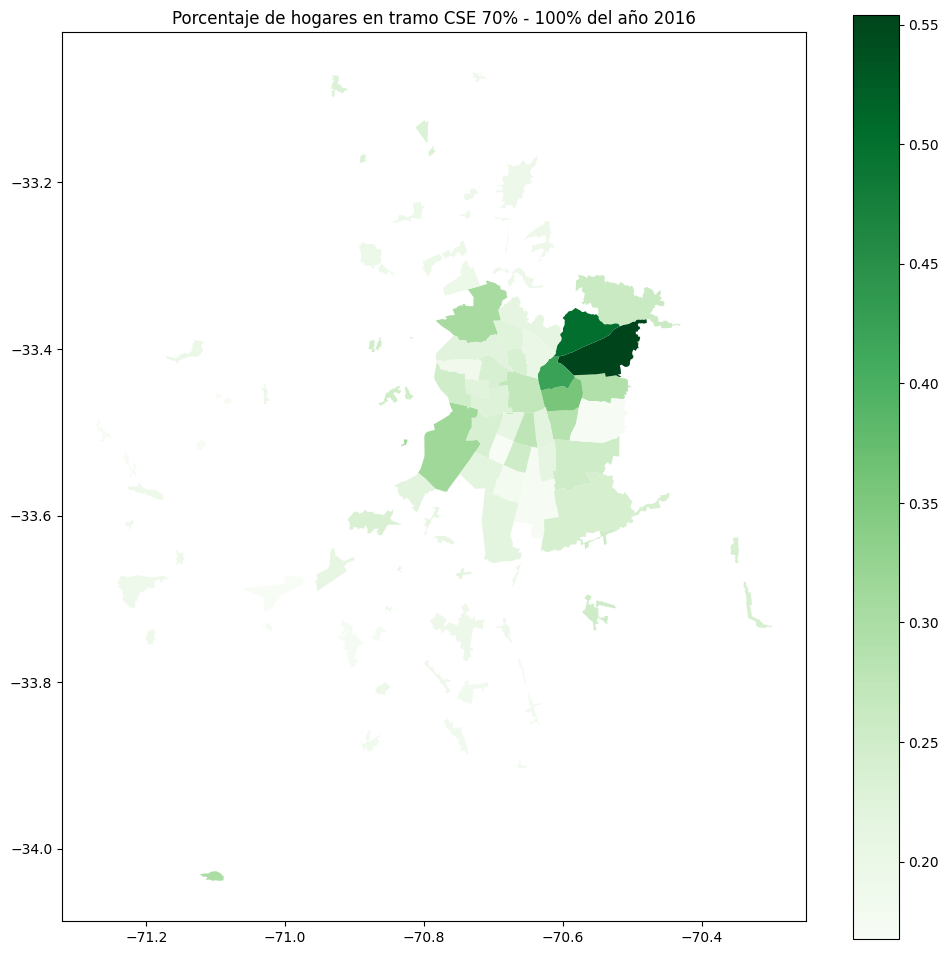

In [14]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2016")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2017')

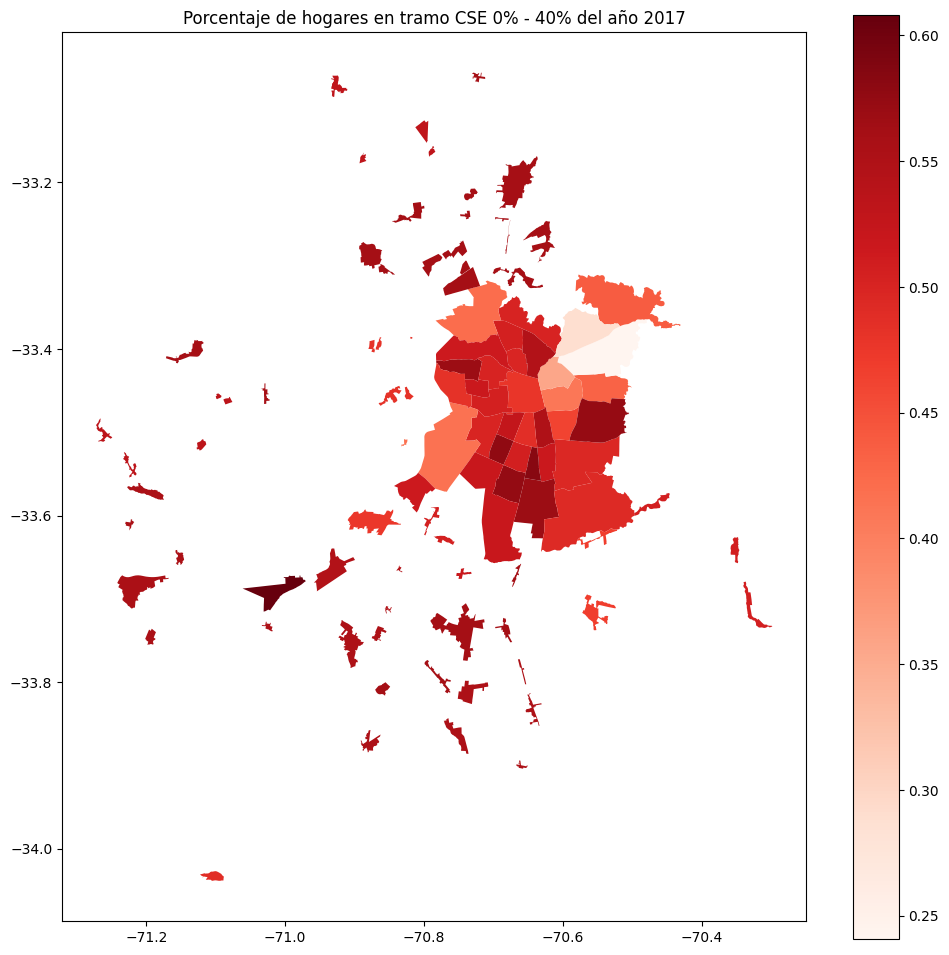

In [15]:
mapa = dict_mapas["201706"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2017")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2017')

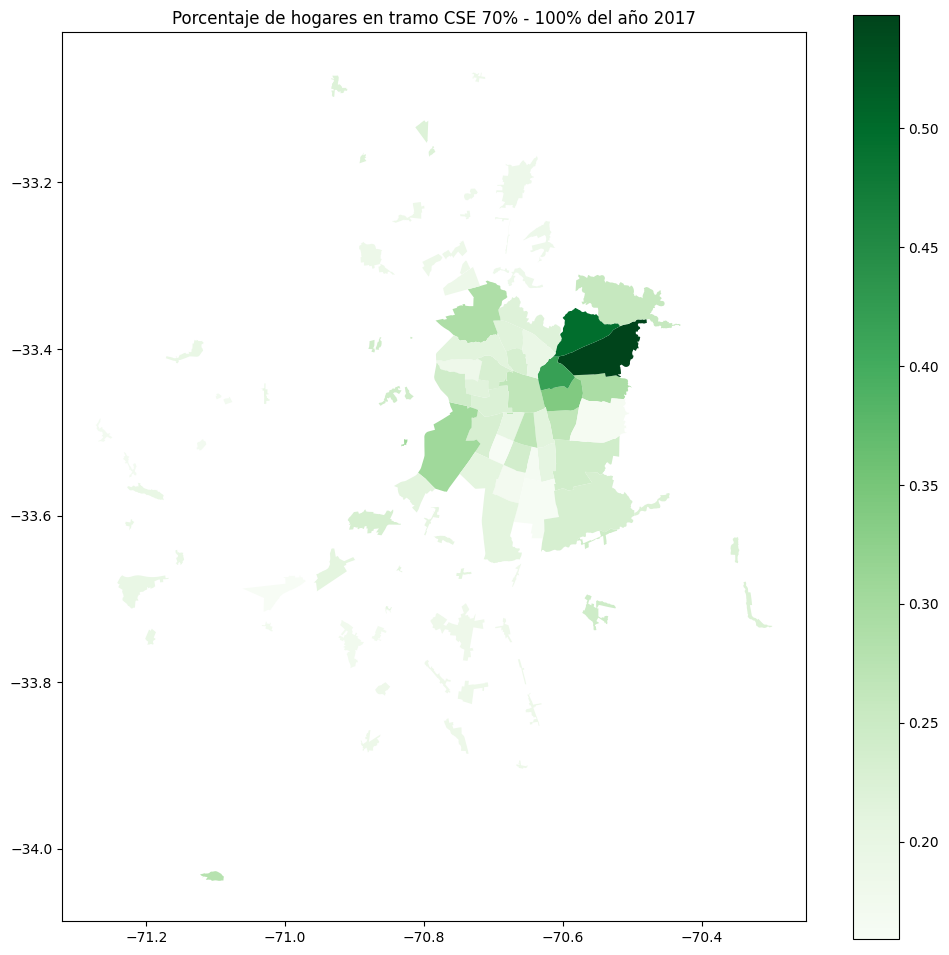

In [17]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2017")